## Erdos-Renyi Graphs <br>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the random seed so the notebook
# produces the same results every time
np.random.seed(17)


In [2]:
# node colors for drawing networks
colors = sns.color_palette('pastel', 5)
sns.set_palette(colors)

### Directed graph <br>
The first example is a directed graph that represents a social network with three nodes.

In [3]:
G = nx.DiGraph()
G.add_node('Alice')
G.add_node('Bob')
G.add_node('Chuck')
list(G.nodes())

['Alice', 'Bob', 'Chuck']

Here's how we add edges between nodes.

In [4]:
G.add_edge('Alice', 'Bob')
G.add_edge('Alice', 'Chuck')
G.add_edge('Bob', 'Alice')
G.add_edge('Bob', 'Chuck')
list(G.edges())

[('Alice', 'Bob'), ('Alice', 'Chuck'), ('Bob', 'Alice'), ('Bob', 'Chuck')]

And here's how to draw the graph.

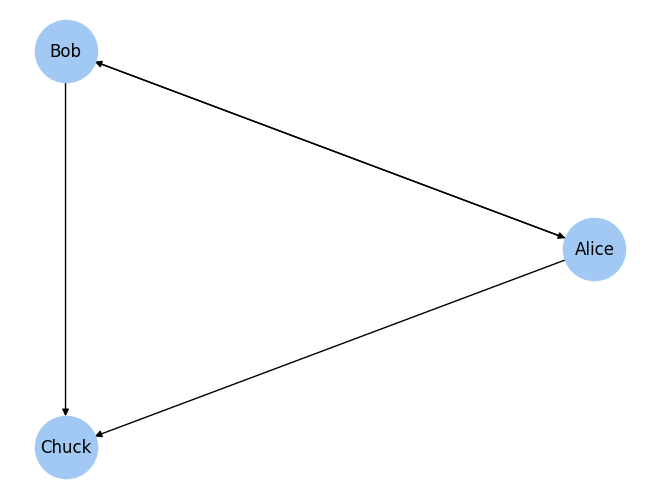

In [5]:
nx.draw_circular(G,
                 node_color='C0',
                 node_size=2000,
                 with_labels=True)

### Undirected graph <br>
The second example is an undirected graph that represents cities and the driving times between them. <br> 
"position" is a dictionary that maps from each city to its coordinates.

In [6]:
positions = dict(Albany=(-74, 43),
               Boston=(-71, 42),
               NYC=(-74, 41),
               Philly=(-75, 40))

positions['Albany']

(-74, 43)

We can use the keys in "pos" to add nodes to the graph.

In [7]:
G = nx.Graph()
G.add_nodes_from(positions)
G.nodes()

NodeView(('Albany', 'Boston', 'NYC', 'Philly'))

"drive_times" is a dictionary that maps from pairs of cities to the driving times between them.

In [8]:
drive_times = {('Albany', 'Boston'): 3,
               ('Albany', 'NYC'): 4,
               ('Boston', 'NYC'): 4,
               ('NYC', 'Philly'): 2}

We can use the keys from "drive_times" to add edges to the graph.

In [9]:
G.add_edges_from(drive_times)
G.edges()

EdgeView([('Albany', 'Boston'), ('Albany', 'NYC'), ('Boston', 'NYC'), ('NYC', 'Philly')])

Now we can draw the graph using "positions" to indicate the positions of the nodes, and "drive_times" to label the edges.

{('Albany', 'Boston'): Text(-72.5, 42.5, '3'),
 ('Albany', 'NYC'): Text(-74.0, 42.0, '4'),
 ('Boston', 'NYC'): Text(-72.5, 41.5, '4'),
 ('NYC', 'Philly'): Text(-74.5, 40.5, '2')}

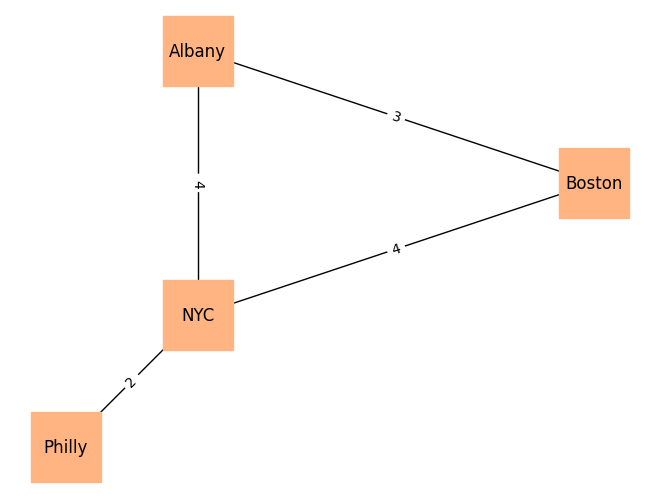

In [10]:
nx.draw(G, positions,
        node_color = 'C1',
        node_shape = 's',
        node_size = 2500,
        with_labels = True)

nx.draw_networkx_edge_labels(G, positions,
                             edge_labels=drive_times)

### Complete graph <br>
To make a complete graph, we use a generator function that iterates through all pairs of nodes.

In [11]:
def all_pairs(nodes):
  for i, u in enumerate(nodes):
    for j, v in enumerate(nodes):
      if i < j:
        yield u, v

"make_complete_graph" makes a Graph with the given number of nodes and edges between all pairs of nodes.

In [12]:
def make_complete_graph(n):
  G = nx.Graph()
  nodes = range(n)
  G.add_nodes_from(nodes)
  G.add_edges_from(all_pairs(nodes))
  return G

Here's a complete graph with 10 nodes:

In [13]:
complete = make_complete_graph(10)
complete.number_of_nodes()

10

And here's what it looks like.

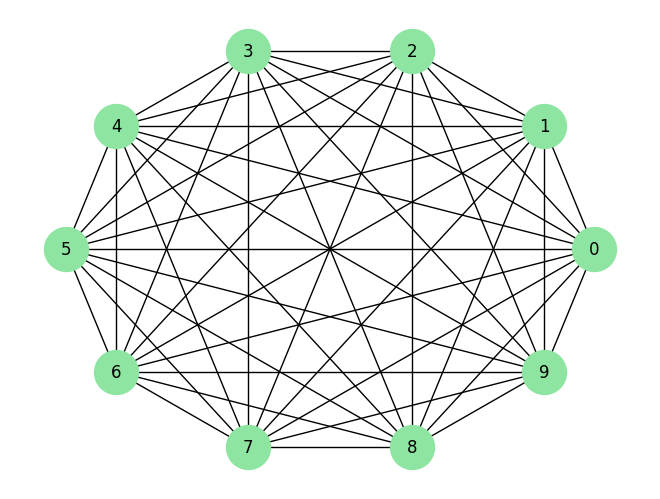

In [14]:
nx.draw_circular(complete,
                 node_color='C2',
                 node_size=1000,
                 with_labels=True)

The "neighbors" method the neighbors for a given node.

In [15]:
list(complete.neighbors(0))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

### Random graphs <br>
Next we'll make a random graph where the probability of an edge between each pair of nodes is "p". <br>
The helper function "flip" returns True with probability "p" and False with probability "1-p".

In [16]:
def flip(p):
  return np.random.random() < p

"random_pairs" is a generator function that enumerates all possible pairs of nodes ans yields each one with probability "p".

In [17]:
def random_pairs(nodes, p):
  for edge in all_pairs(nodes):
    if flip(p):
      yield edge

"make_random_graph" makes an ER graph where the probability of an edge between each pair of node is "p"

In [18]:
def make_random_graph(n, p):
  G = nx.Graph()
  nodes = range(n)
  G.add_nodes_from(nodes)
  G.add_edges_from(random_pairs(nodes, p))
  return G

Here's an example with n=10 and p=0.3

In [19]:
np.random.seed(10)

random_graph = make_random_graph(10, 0.3)
len(random_graph.edges())

12

And here's what it looks like:

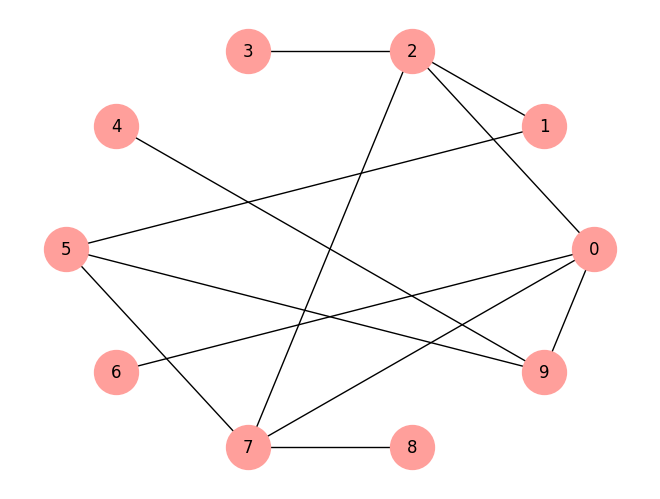

In [20]:
nx.draw_circular(random_graph,
                 node_color='C3',
                 node_size=1000,
                 with_labels=True)